In [ ]:
import pandas as pd

In [ ]:
# Load the dataset (use read_csv for CSV files)
data = pd.read_csv('/content/base_data.csv')

# Display the first few entries
print(data.head(5))

# Assign the dataset to another variable if needed
dfs = data

          word                                           sentence sentiment
0           cx  No cap, that new drop is straight cx,  major L...  positive
1       crispr  OMG, my bio project's *crispr*-ed,  like, tota...  positive
2         defi  No cap, my bro's DeFi project totally flopped;...  negative
3         oled  OMG, my new phone's display is so oled, the co...  positive
4  longtermism  Honestly, my grandpa's *longtermism* about cli...  negative


In [ ]:
from transformers import pipeline

# Initialize BERTweet for sentiment analysis
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# Load your CSV file
data = pd.read_csv('/content/base_data.csv')

# Display the sentences and their predicted sentiment
print(data[['sentence', 'sentiment']].head())

# Apply the model on each text in the DataFrame
for text in data['sentence']:
    result = sentiment_analysis(text)
    print(f"sentence: {text}, Sentiment: {result[0]['label']}, Confidence: {result[0]['score']}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


                                            sentence sentiment
0  No cap, that new drop is straight cx,  major L...  positive
1  OMG, my bio project's *crispr*-ed,  like, tota...  positive
2  No cap, my bro's DeFi project totally flopped;...  negative
3  OMG, my new phone's display is so oled, the co...  positive
4  Honestly, my grandpa's *longtermism* about cli...  negative
sentence: No cap, that new drop is straight cx,  major L for my wallet but W for my drip., Sentiment: NEU, Confidence: 0.6384398937225342
sentence: OMG, my bio project's *crispr*-ed,  like, totally fixed my messed-up DNA—it's giving *chef's kiss*., Sentiment: POS, Confidence: 0.9802891612052917
sentence: No cap, my bro's DeFi project totally flopped;  he's now shook,  losing all that crypto is, like, low-key tragic., Sentiment: NEG, Confidence: 0.9743664264678955
sentence: OMG, my new phone's display is so oled, the colors are straight-up fire, no cap., Sentiment: POS, Confidence: 0.9682298898696899
sentence: Hones

In [ ]:
!pip install datasets


In [ ]:
pip install transformers datasets scikit-learn pandas


In [ ]:
from peft import PeftModel, PeftConfig, get_peft_model, LoraConfig
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
import pandas as pd

In [ ]:
neologism_data = pd.read_csv('/content/base_data.csv')

In [ ]:
neologism_data

,word,sentence,sentiment,label
0,cx,"No cap, that new drop is straight cx, major L...",positive,2
1,crispr,"OMG, my bio project's *crispr*-ed, like, tota...",positive,2
2,defi,"No cap, my bro's DeFi project totally flopped;...",negative,0
3,oled,"OMG, my new phone's display is so oled, the co...",positive,2
4,longtermism,"Honestly, my grandpa's *longtermism* about cli...",negative,0
...,...,...,...,...
2500,hallucination,"OMG, that influencer's latest fit pic is a tot...",positive,2
2501,social distancing,"Low-key, social distancing kinda slaps now tha...",positive,2
2502,twindemic,"OMG, this twindemic of finals and flu season i...",negative,0
2503,mald,"Bro, he totally malded when he lost that Fortn...",negative,0


In [ ]:
neologism_data['sentence'] = neologism_data['sentence'].astype(str)
neologism_data['sentiment'] = neologism_data['sentiment'].astype(str)
def assign_label(sentiment):
    if sentiment == 'positive':
        return 2
    elif sentiment == 'neutral':
        return 1
    else:
        return 0

neologism_data['label'] = neologism_data['sentiment'].apply(assign_label)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    neologism_data['sentence'], neologism_data['label'], test_size=0.2, random_state=42
)

# Create DatasetDict
dataset = DatasetDict({
    'train': Dataset.from_dict({'label': y_train.tolist(), 'sentence': x_train.tolist()}),
    'validation': Dataset.from_dict({'label': y_test.tolist(), 'sentence': x_test.tolist()})
})

In [ ]:
reddit_df = pd.read_csv('/content/the-reddit-dataset-dataset-comments.csv')

In [ ]:
print(reddit_df['body'].dtype)
print(reddit_df['sentiment'].dtype)

object
float64


In [ ]:
reddit_df = reddit_df.dropna(subset=['body', 'sentiment'])
reddit_df['body'] = reddit_df['body'].astype(str)
reddit_df['sentiment'] = reddit_df['sentiment'].astype(float)
def assign_label(score):
    if score < -0.5:
        return 0  # Negative
    elif -0.5 <= score <= 0.5:
        return 1  # Neutral
    else:
        return 2  # Positive

reddit_df['label'] = reddit_df['sentiment'].apply(assign_label)

<ipython-input-18-4cee87c860aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_df['body'] = reddit_df['body'].astype(str)
<ipython-input-18-4cee87c860aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_df['sentiment'] = reddit_df['sentiment'].astype(float)
<ipython-input-18-4cee87c860aa>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [ ]:
reddit_df = reddit_df.dropna(subset=['body', 'sentiment'])
reddit_df['body'] = reddit_df['body'].astype(str)
reddit_df['sentiment'] = reddit_df['sentiment'].astype(float)
def assign_label(score):
    if score < -0.5:
        return 0  # Negative
    elif -0.5 <= score <= 0.5:
        return 1  # Neutral
    else:
        return 2  # Positive

reddit_df['label'] = reddit_df['sentiment'].apply(assign_label)

In [ ]:
neo_words = neologism_data.word
neo_words_set = set(neo_words.str.lower())

In [ ]:
fil_reddit_df = reddit_df[reddit_df['body'].str.contains('|'.join(neo_words_set), case=False, na=False)]

In [ ]:
# Define batch size for processing
batch_size = 16

# Initialize lists to store predictions
pretrained_predictions = []
fine_tuned_predictions = []

# Process texts in batches
for i in range(0, len(reddit_texts), batch_size):
    batch = reddit_texts[i:i+batch_size]

    # Get predictions for the batch
    pretrained_batch_results = sentiment_analysis_pretrained(batch)
    fine_tuned_batch_results = sentiment_analysis_fine_tuned(batch)

    # Extract sentiments
    pretrained_predictions.extend([result['label'] for result in pretrained_batch_results])
    fine_tuned_predictions.extend([result['label'] for result in fine_tuned_batch_results])

    # Progress logging
    print(f"Processed batch {i // batch_size + 1}/{len(reddit_texts) // batch_size + 1}")

# Output predictions for verification
print("Pretrained Model Predictions:", pretrained_predictions[:10])
print("Fine-tuned Model Predictions:", fine_tuned_predictions[:10])


In [ ]:
from transformers import BertweetTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import DataCollatorWithPadding

# Load your dataset with 3 columns: 'word', 'sentence with word', and 'sentiment'
data = pd.read_csv('/content/base_data.csv')

# Check the first few rows to ensure it's loaded correctly
print(data.head())

# Pre-process sentiment labels (make sure the labels are mapped correctly)
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}  # Modify according to your labels
data['sentiment'] = data['sentiment'].map(sentiment_mapping)

# Split the data into train and validation sets
train_df, val_df = train_test_split(data, test_size=0.2)

# Convert to HuggingFace Dataset format
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

# Initialize the tokenizer and model
tokenizer = BertweetTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
model = BertForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis", num_labels=3)

# Tokenize the dataset with explicit padding and truncation
def tokenize_function(examples):
    return tokenizer(
        examples['sentence'],
        padding=True,          # Dynamically pad sequences to the longest in the batch
        truncation=True,       # Truncate sequences longer than max_length
        max_length=512         # Ensure sequences don't exceed 512 tokens
    )

# Apply tokenization to the dataset
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

# Ensure columns are aligned correctly for HuggingFace Dataset
train_dataset = train_dataset.rename_column("sentiment", "labels")
val_dataset = val_dataset.rename_column("sentiment", "labels")

# Set the format for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Define the data collator for dynamic padding (to ensure equal lengths in each batch)
data_collator = DataCollatorWithPadding(tokenizer)

# Define training arguments
training_args = TrainingArguments(
    output_dir="/content/results",  # Where to save the model
    num_train_epochs=3,  # Number of training epochs
    per_device_train_batch_size=8,  # Batch size for training
    per_device_eval_batch_size=8,  # Batch size for evaluation
    warmup_steps=500,  # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,  # Strength of weight decay
    logging_dir="/content/logs",  # Directory for storing logs
    logging_steps=10,  # Log every 10 steps
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",  # Save model at the end of each epoch
    dataloader_num_workers=4,  # Set the number of workers for data loading
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,  # Pass the data collator here
)

# Fine-tune the model
trainer.train()

# Save the fine-tuned model
model.save_pretrained("/content/fine_tuned_model")
tokenizer.save_pretrained("/content/fine_tuned_model")

# Evaluate the fine-tuned model
results = trainer.evaluate()
print("Fine-tuned model evaluation results:", results)

# Load the fine-tuned model for inference
from transformers import pipeline
sentiment_analysis_fine_tuned = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Compare pre-trained vs fine-tuned model on a few sample sentences
sample_sentences = data['sentence'].head(10)

# Results from the pre-trained model
sentiment_analysis_pretrained = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis")

print("Results from Pre-trained Model:")
for text in sample_sentences:
    result = sentiment_analysis_pretrained(text)
    print(f"Sentence: {text}, Pre-trained Sentiment: {result[0]['label']}, Confidence: {result[0]['score']}")

print("\nResults from Fine-tuned Model:")
for text in sample_sentences:
    result = sentiment_analysis_fine_tuned(text)
    print(f"Sentence: {text}, Fine-tuned Sentiment: {result[0]['label']}, Confidence: {result[0]['score']}")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


          word                                           sentence sentiment
0           cx  No cap, that new drop is straight cx,  major L...  positive
1       crispr  OMG, my bio project's *crispr*-ed,  like, tota...  positive
2         defi  No cap, my bro's DeFi project totally flopped;...  negative
3         oled  OMG, my new phone's display is so oled, the co...  positive
4  longtermism  Honestly, my grandpa's *longtermism* about cli...  negative


You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.sel

Map:   0%|          | 0/2004 [00:00<?, ? examples/s]

Map:   0%|          | 0/501 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more inf

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.798000,0.691501
2,0.663800,0.486359
3,0.531200,0.500692


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: T

Fine-tuned model evaluation results: {'eval_loss': 0.5006919503211975, 'eval_runtime': 115.4997, 'eval_samples_per_second': 4.338, 'eval_steps_per_second': 0.545, 'epoch': 3.0}


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Results from Pre-trained Model:
Sentence: No cap, that new drop is straight cx,  major L for my wallet but W for my drip., Pre-trained Sentiment: NEU, Confidence: 0.6384398937225342
Sentence: OMG, my bio project's *crispr*-ed,  like, totally fixed my messed-up DNA—it's giving *chef's kiss*., Pre-trained Sentiment: POS, Confidence: 0.9802891612052917
Sentence: No cap, my bro's DeFi project totally flopped;  he's now shook,  losing all that crypto is, like, low-key tragic., Pre-trained Sentiment: NEG, Confidence: 0.9743664264678955
Sentence: OMG, my new phone's display is so oled, the colors are straight-up fire, no cap., Pre-trained Sentiment: POS, Confidence: 0.9682298898696899
Sentence: Honestly, my grandpa's *longtermism* about climate change is low-key sus;  like, bro, we need action *now*, not in some distant, dystopian future., Pre-trained Sentiment: NEG, Confidence: 0.5806673169136047
Sentence: My culture budget's looking kinda sus this month; rent's a whole vibe killer,  but at 

Accuracy: 0.8000
Precision: 0.7667
Recall: 0.8000
F1 Score: 0.7644

Classification Report:
              precision    recall  f1-score   support

         POS       1.00      0.80      0.89         5
         NEG       0.00      0.00      0.00         1
         NEU       0.67      1.00      0.80         4

    accuracy                           0.80        10
   macro avg       0.56      0.60      0.56        10
weighted avg       0.77      0.80      0.76        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

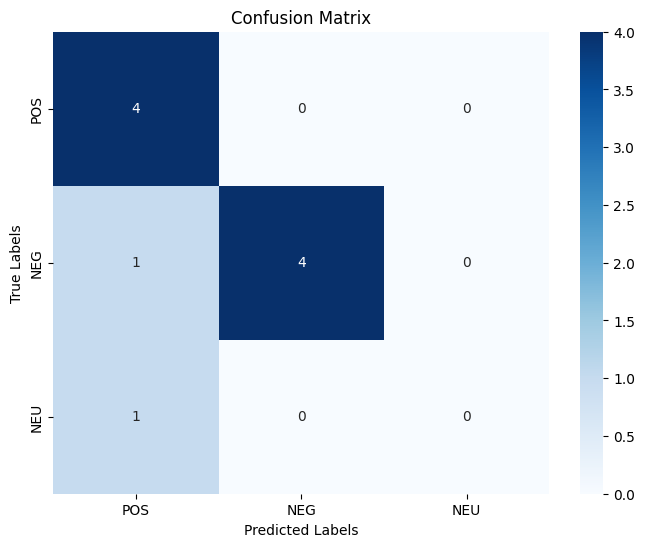

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support

# Define the true labels and predicted labels from the fine-tuned model
# For simplicity, assume that your model outputs are binary or multi-class labels like 'POS', 'NEG', 'NEU'.
# You would replace these arrays with your actual predictions and true labels

#visualization of results from sampled test data
# True labels (from your test set)
true_labels = [
    "POS", "POS", "NEG", "POS", "NEG", "NEG", "NEU", "POS", "NEG", "NEG"
]

# Predicted labels (from fine-tuned model)
predicted_labels = [
    "POS", "POS", "NEG", "POS", "NEG", "NEG", "POS", "POS", "NEG", "POS"
]

# Compute Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Compute Precision, Recall, F1 Score (weighted average)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate the Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['POS', 'NEG', 'NEU']))

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=['POS', 'NEG', 'NEU'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['POS', 'NEG', 'NEU'], yticklabels=['POS', 'NEG', 'NEU'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
